# Compare Throughputs

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 12th 2023
- last update : February 14th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [27]:
from scipy import interpolate
from scipy.interpolate import interp1d

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE=20230118

In [6]:
filenames_from_bouguerlines = [
"../../BouguerLines/202302/MLfit_bouguer_linearfit-20230118-OG550_65mm_1~holo4_003-config_PSF2DFFM-REBIN2_bin30nm_out.csv",
"../../BouguerLines/202302/MLfit_bouguer_linearfit-20230118-empty~holo4_003-config_PSF2DFFM-REBIN2_bin30nm_out.csv"
]

In [7]:
tags_from_bouguerlines = ["Bouguer lines : filter OG550", "Bouguer lines : no filter"]

In [8]:
filenames = [
"throughput-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2-fitatmparams.csv",
"throughput-2023-01-18-empty~holo4_003-psf2dffm-rebin2-fitatmparams.csv",
#"throughput-2023-01-18-empty~holo4_003-psf2dffm-rebin1-fitatmparams.csv"
]
tags = ["OG550_65mm_1 - psf2dffm-rebin2 ", "No Filter psf2dffm-rebin2","No Filter psf2dffm-rebin1" ]

In [9]:
all_dfs_from_bouguerlines = []
for filename in filenames_from_bouguerlines:
    all_dfs_from_bouguerlines.append(pd.read_csv(filename))

In [10]:
all_df = []
for filename in filenames:
    all_df.append(pd.read_csv(filename))

In [11]:
NF =len(all_df)
NFB = len(all_dfs_from_bouguerlines)

In [12]:
all_df[0].head()

,Unnamed: 0,wavelength,newthrou,newthrouerr,oldthrou
0,0,500.0,0.000001,0.000046,0.000002
1,1,501.0,0.000001,0.000046,0.000002
2,2,502.0,0.000001,0.000046,0.000002
3,3,503.0,0.000001,0.000046,0.000002
4,4,504.0,0.000001,0.000046,0.000002


In [13]:
all_dfs_from_bouguerlines[0].head()

,Unnamed: 0,wavelength,throu,errthrou,sedtoa,errsedtoa
0,0,500.000000,0.000018,0.000009,3.810277e-15,1.862371e-15
1,1,511.224490,0.000119,0.000030,4.176772e-14,1.037461e-14
2,2,522.448980,0.002955,0.000578,1.122410e-12,2.193394e-13
3,3,533.673469,0.019949,0.001795,6.987303e-12,6.287757e-13
4,4,544.897959,0.051816,0.001851,1.678371e-11,5.994123e-13


In [14]:
hls_colors = sns.color_palette("hls", NF)

Text(0.5, 0, '$\\lambda$  (nm)')

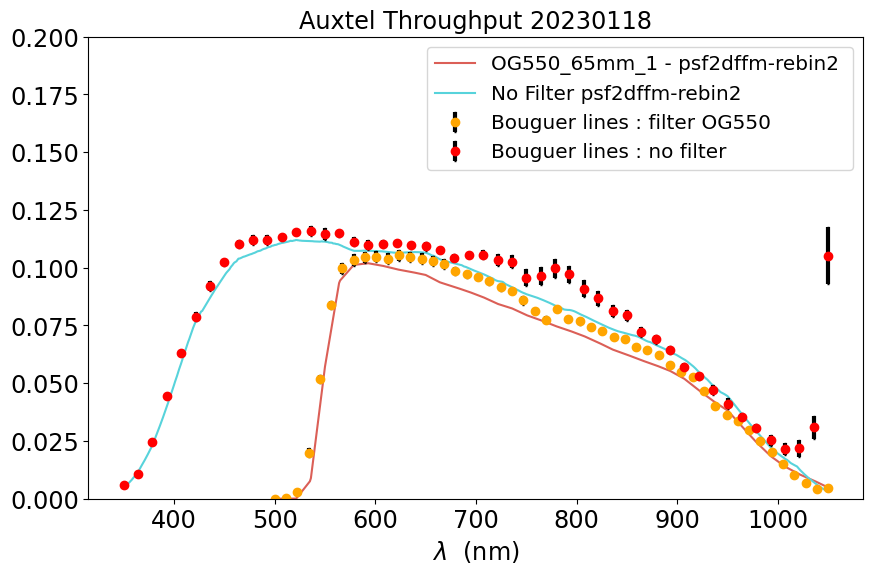

In [15]:
for ii in range(NF):
    the_df = all_df[ii]
    plt.plot(the_df["wavelength"],the_df["newthrou"],'-',color=hls_colors[ii],label=tags[ii])
    #plt.errorbar(the_df["wavelength"],the_df["newthrou"], yerr=the_df["newthrouerr"], xerr=None, fmt='.',color=hls_colors[ii],ecolor="grey", elinewidth=3, capsize=1)
 
for idx in range(2):
    X=all_dfs_from_bouguerlines[idx].wavelength
    Y=all_dfs_from_bouguerlines[idx].throu
    EY=all_dfs_from_bouguerlines[idx].errthrou
    if idx==0:
        col="orange"
    else:
        col="r"
    plt.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color=col,ecolor="k", elinewidth=3, capsize=1,label=tags_from_bouguerlines[idx])


plt.legend(loc="upper right")
    
plt.ylim(0,0.2)
plt.title(f"Auxtel Throughput {DATE}")
plt.xlabel("$\lambda$  (nm)")

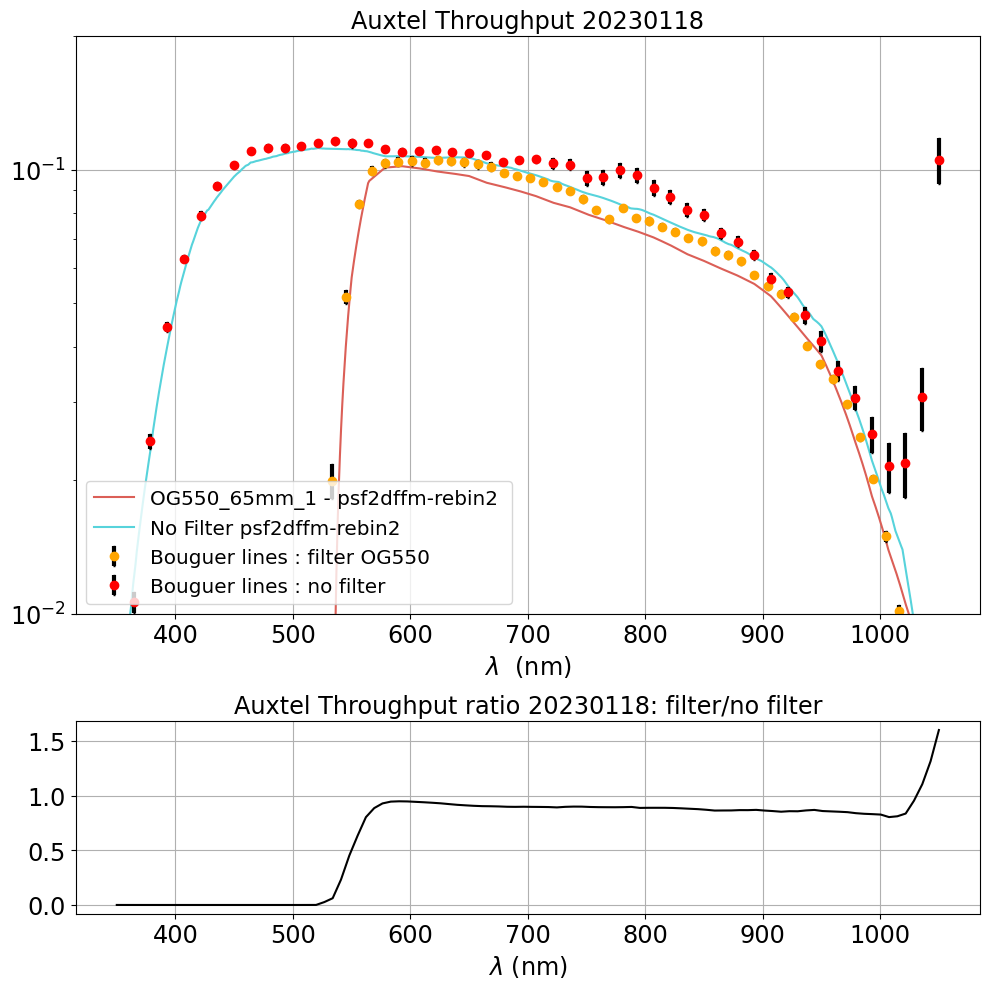

In [42]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 1,height_ratios=[3,1] ,figure=fig)

# Fig 1
ax=fig.add_subplot(gs[0,0])
for ii in range(NF):
    the_df = all_df[ii]
    ax.plot(the_df["wavelength"],the_df["newthrou"],'-',color=hls_colors[ii],label=tags[ii])
    #plt.errorbar(the_df["wavelength"],the_df["newthrou"], yerr=the_df["newthrouerr"], xerr=None, fmt='.',color=hls_colors[ii],ecolor="grey", elinewidth=3, capsize=1)

for idx in range(2):
    X=all_dfs_from_bouguerlines[idx].wavelength
    Y=all_dfs_from_bouguerlines[idx].throu
    EY=all_dfs_from_bouguerlines[idx].errthrou
    if idx==0:
        col="orange"
    else:
        col="r"
    ax.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color=col,ecolor="k", elinewidth=3, capsize=1,label=tags_from_bouguerlines[idx])

ax.grid()    
ax.set_yscale('log')
ax.set_ylim(1e-2,0.2)
ax.legend(loc="lower left")
ax.set_title(f"Auxtel Throughput {DATE}")
ax.set_xlabel("$\lambda$  (nm)")
main_ax =ax

# Fig 2

WL = np.linspace(350,1050,100)

ax=fig.add_subplot(gs[1,0],sharex=main_ax)

the_df1 = all_df[0]
the_df2 = all_df[1]


X1=the_df1["wavelength"].values
X2=the_df2["wavelength"].values
Y1=the_df1["newthrou"].values 
Y2=the_df2["newthrou"].values 

f1 = interpolate.interp1d(X1,Y1,bounds_error=False,fill_value="extrapolate")
f2 = interpolate.interp1d(X2,Y2,bounds_error=False,fill_value="extrapolate")
ratio = f1(WL)/f2(WL)

ax.plot(WL,ratio,'k-')
ax.grid()  
ax.set_title(f"Auxtel Throughput ratio {DATE}: filter/no filter")
ax.set_xlabel("$\lambda$ (nm)")

plt.tight_layout()

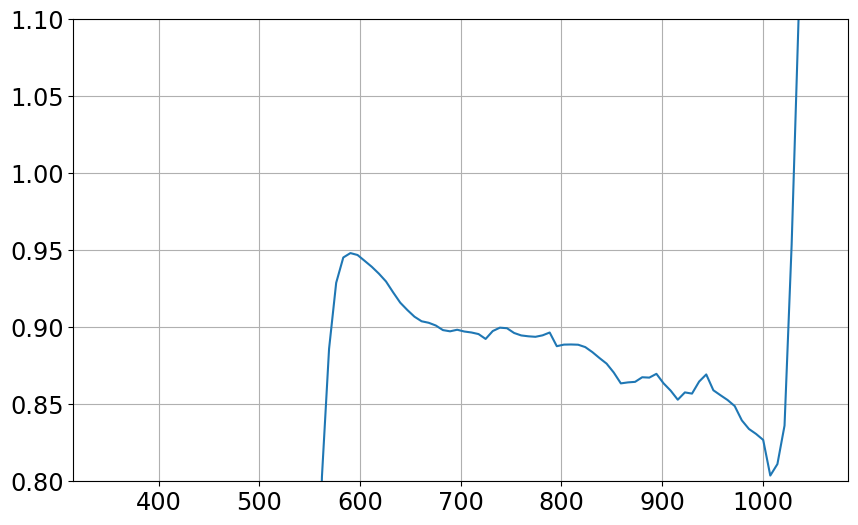

In [43]:
plt.plot(WL,f1(WL)/f2(WL))
plt.ylim(0.8,1.1)
plt.grid()